# Session 4: POS Taggers

#### Package imports and data downloading

In [9]:
import nltk
import dill
# nltk.download('treebank')
from nltk.corpus import treebank
from nltk.tag.hmm import HiddenMarkovModelTrainer
from nltk.tag import tnt
from nltk.tag.perceptron import PerceptronTagger
from nltk.tag import CRFTagger

We will train all the combinations of the following number of data rows and models.

In [10]:
n_sents = [500, 1000, 1500, 2000, 2500, 3000]
trainers = ['HMM','TNT', 'PER', 'CRF']

#### Training
We save the models in disk (in case we need them later on).

In [18]:
for name in trainers:
    print('Training', name, '...')
    models[name] = []
    for n in n_sents:
        print('With', n, 'rows')
        train_data = treebank.tagged_sents()[:n]
        if name == 'HMM':
            trainer = HiddenMarkovModelTrainer()
            model = trainer.train_supervised(train_data)
        elif name == 'TNT':
            model = tnt.TnT()
            model.train(train_data)
        elif name == 'PER':
            model = PerceptronTagger(load=False)
            model.train(train_data)
        elif name == 'CRF':
            model = CRFTagger()
            model.train(train_data, 'crf_tagger_model_' + str(n))
        if name != 'CRF':
            with open(name.lower() + '_treebank_pos_tagger_' + str(n), 'wb') as f:
                dill.dump(model, f)

Training HMM ...
With 500 rows
With 1000 rows
With 1500 rows
With 2000 rows
With 2500 rows
With 3000 rows
Training TNT ...
With 500 rows
With 1000 rows
With 1500 rows
With 2000 rows
With 2500 rows
With 3000 rows
Training PER ...
With 500 rows
With 1000 rows
With 1500 rows
With 2000 rows
With 2500 rows
With 3000 rows
Training CRF ...
With 500 rows
With 1000 rows
With 1500 rows
With 2000 rows
With 2500 rows
With 3000 rows


#### Evaluation
For evaluating the models, we will use the remaining rows, which have not been used for training any of the models (therefore, the evaluation will be fair).

We are loading the models from disk instead of memory because in research or industry we would like to save the models for using them later.

In [27]:
test_data = treebank.tagged_sents()[3000:]
accuracies = {}
for name in trainers:
    print('Evaluating', name, '...')
    accuracies[name] = []
    for n in n_sents:
        model = None
        if name != 'CRF':
            with open(name.lower() + '_treebank_pos_tagger_' + str(n), 'rb') as f:
                model = dill.load(f)
        else:
            model = CRFTagger()
            model.set_model_file('crf_tagger_model_' + str(n))
        accuracies[name].append(round(model.evaluate(test_data), 3))

Evaluating HMM ...
Evaluating TNT ...
Evaluating PER ...
Evaluating CRF ...


#### Plot and conclusions

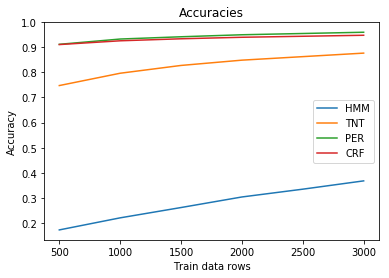

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline


for name in trainers:
    plt.plot(n_sents, accuracies[name], label=name)

plt.xlabel('Train data rows')
plt.ylabel('Accuracy')

plt.title("Accuracies")

plt.legend()

plt.show()

First of all, in general, we can see that the more data, the better the models, since in machine learning seeing more data points can help to better estimate the underlying probability distribution and generalize better.

The best models as per accuracy are PER and CRF. For choosing between them, we should have to consider other factors, such as model simplicity, depending on the problem requirements (CPU efficiency, memory efficiency,...). These two models seem to be very sample/data efficient as well, at least in this case, because with a few rows they already have accuracies above 0.9. The other two models start way below, but at least they seem to scale well with more data. HMM does not seem to be expressive enough to capture the complexity of this problem, and performs poorly.